#**A-Introduction**

##1.1 Background:
* The restaurant is one of the most welcome, loved and visited elements of life by almost all humans.  Everyone loves to taste new culinary recipes. We are all, always curious to discover a meal whose culinary specificity is less familiar to us or a certain meal that we have long had less opportunity to taste.  
Also, some people simply don't have the time or inclination to cook for themselves, and therefore wish to live in areas where they can easily find restaurants that suit their tastes.
It is therefore an economic advantage for anyone wishing to open a restaurant in a given location to know the culinary tastes of the people living in that location

##1.2 Problem :
* Let's imagine for a moment that a resident of Paris wishes to open an Italian or Asian restaurant in Paris. However, it is very difficult for him to determine in which areas of Paris it will be advantageous for him to open a successful restaurant.
First, because he must know the different restaurants that exist in France and their number in order to determine which ones are popular and dominant and which ones are less popular. 
Secondly, he must know clearly what are the culinary specialties associated with each restaurant residing in Paris.

##1.3 Interest
* Knowledge of the predominant restaurants in Paris, knowledge of the specific neighborhoods and locations where these restaurants reside, and knowledge of the different culinary specialties that exist will help determine three things: the type of culinary specialty that is very popular and trendy, the degree of competition present, and the successful validation of the choice of the ideal location for the creation of the restaurant.

* This project will show how, with an in-depth data analysis supported by some machine learning methods, we will be able to determine in which areas of Paris there are more restaurants, what are the popular culinary types in Paris, and therefore what is the ideal culinary specialty to offer according to the different areas of Paris, for anyone who wants to open a restaurant in Paris?


#**B-Source of Data:Wikipedia and the Foursquare API.**
* We got our Dataframe from Wikipedia, from this [link](https://bit.ly/3gmdlkr), and geospatial data via the Foursquare API.Then we cleaned them up so that our exploratory analysis would be as faithful and correct as possible with the final result of our project:


#**C-Methodological Structure:** 
###**1.Introduction:** 
####1.1.contextualization
####1.2 problem
####1.3 interest
###**2-PART I: Data**
####2-1 Data collection
####2-2 Data cleaning
####**3-PART II: Exploration Data Analysis**
####**4-PART III: Classification modele:Clustering**
#### 4-1 Cluster 1
####4-2 Cluster 2
###**5-Discussion and Recommandation**
###**6-Conclusion**


##**D-Results:**

#***PART I: Data Collection, Data cleaning and Geo-visualisation***
####1-Collecting our dataset from Wikipedia, that contain Paris Neighborhood
####1-1 Checking the size of our dataset
####2- Data cleaning
####3-Summary of all information after collecting and cleaning our dataset
####4-Collecting, via Foursquare API, our data contain Paris Neighborhoods geo-coordinates
####5-New size of our Data Frame
####6-Summary of coordinates and their associated Neighborhods
####7-Visualization of our Paris neighborhoods around Château Rouge
#***PART II: Exploration Data Analysis***
####8-Explore Paris's Neighbourhood
#####8-1 Define Foursquare Credentials and Version
#####8-2-1 Explore venues of neighborhoods in our dataframe
#####8-2-2 Here are the Neighborhoods kept, where we try to determine the number of venues by neighborhood
####9- Let's display our dataframe according to the names, venues of neighbrhoods, coordinates, venues categories etc ...
####10-Siz of this DataFrame
####11-Check the number of venues per district(per neighborhood)
####12-Check the frequence all different companies and businesses per Venue Category
####13- Relationship between Venues catégory ans Frequence of retaurants
####14-Analyzing each neigborhood

####14-0 One Hot Encoding
####14-1 check dataframe shape
####14-2-Let's now group rows by neighborhood and take the mean of the frequency of occurrence of each business category
####14-3 Let's find out each neighborhood with its top 5 most common venues and their associated businesses
####14-4-Let's put that into dataframe
#**PART III: Unsupervised machine learning clustering: k-means**
####15-Cluster Neighborhoods
####15-1 We use here the solhouette method to determine the ideal number k of clusters available in our dataset:
####15-2-Create a new dataframe that includes the cluster...
####15-3-Examine each clusters
####15-3-1 Cluster 1
####15-3-2 Cluster 2


In [348]:
!pip install bs4
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import seaborn as sns


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.metrics import silhouette_score

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


# **PART I: Data Collection, Data cleaning  and First Geo-visualisation**

# 1-Collecting our dataset from Wikipedia, that contain Paris Neighborhood





In [349]:
# url from our Wikipedia page
url = "https://en.wikipedia.org/wiki/Arrondissements_of_Paris" 


In [350]:
# To send requests to the Wikipedia page
data = requests.get(url).text 

# 2- BeautifulSoup: For the synthaxic analysis of the html code of our Wikipedia data
soup = BeautifulSoup(data, 'html5lib')

In [351]:
#Get all the html tags that make up the Table containing all the information from our dataset
tables = soup.find_all('table')

In [352]:
# Scrape our dataset frome Wikipedia page
df_paris = pd.read_html(str(tables[1]), flavor='bs4')[0]
df_paris

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor (2020-2026)
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD)
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR)
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR)
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR)
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),60071,27556,1901,Delphine Bürkli (DVD)
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),90836,31431,1881,Alexandra Cordebard (PS)


#**1-1 Checking the size of our dataset**

In [353]:
print('We first have', df_paris.shape[0],'rows and',df_paris.shape[1],'columns')

We first have 20 rows and 7 columns


# **2- Data cleaning**

###**2-1 We remove the columns that are not necessary for us**

There are, in this set of data, many elements that will not be useful to us; for example, the first column is actually equivalent to the second column while the fourth and fifth seem to mean almost the same thing. The third and last columns are simply not useful for our project. So, we will delete all these columns and keep only the second, fourth, fifth and sixth columns. 

In [354]:
df_paris.drop(df_paris.columns[[0,2,4,5,6]], axis=1, inplace=True) 
df_paris

,Name,Population(2017 estimate)
0,Louvre,100196
1,Bourse,100196
2,Temple,100196
3,Hôtel-de-Ville,100196
4,Panthéon,59631
5,Luxembourg,41976
6,Palais-Bourbon,52193
7,Élysée,37368
8,Opéra,60071
9,Entrepôt,90836


###**2-2 Our dataframe is not quite clean: let's make it a little clean again**

In [355]:
# Rename cetraints coplumns of our dataftame 
df_paris.rename(columns={'Population(2017 estimate)':'Population(2017)'},inplace=True)

In [356]:
df_paris

,Name,Population(2017)
0,Louvre,100196
1,Bourse,100196
2,Temple,100196
3,Hôtel-de-Ville,100196
4,Panthéon,59631
5,Luxembourg,41976
6,Palais-Bourbon,52193
7,Élysée,37368
8,Opéra,60071
9,Entrepôt,90836


In [357]:
print('Now, our first Dataset is cleaning, and now we also have' ,df_paris.shape[0],'rows and',df_paris.shape[1],'columns')

Now, our first Dataset is cleaning, and now we also have 20 rows and 2 columns


#**3-Summary of all information after collecting and cleaning our dataset**

In [358]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              20 non-null     object
 1   Population(2017)  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


#**4-Collecting, via Foursquare API, our data contain Paris Neighborhoods geo-coordinates**

### **4-1 Find geograhical coordinates of Château Rouge**

In [359]:
#adress of «Château Rouge» (Paris's Neighborhood where nmany foreigners live there)
address = "Château-Rouge, Boulevard Barbès"

#convert our address into latitude and longitude values
geolocator = Nominatim(user_agent="18e_Arrondissement_explorr")

#Location of the exact place relative to our address
location = geolocator.geocode(address)
#first geographical coordinate of our place
latitude = location.latitude

#second geographical coordinate of our place
longitude = location.longitude
print("The geograpical coordinate of Chateau Rouge(Paris) are {}, {}.".format(latitude, longitude))

The geograpical coordinate of Chateau Rouge(Paris) are 48.8872884, 2.3495532.


###**4-2 Collection of all the geospacial coordinates of the**
###**Paris's districts present in our dataset via the Foursquare API**

In [360]:
df_paris['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

0             (48.8611473, 2.33802768704666)
1                    (48.8686296, 2.3414739)
2                   (31.098207, -97.3427847)
3     (43.949283050000005, 4.80525979935093)
4          (41.89861595, 12.476833414483862)
5                    (49.8158683, 6.1296751)
6          (48.86159615, 2.3179092733655935)
7                   (4.7530415, -54.0449534)
8                      (48.876019, 2.339962)
9                    (48.8761258, 2.3598394)
10                     (48.858416, 2.379703)
11                   (49.0781397, 1.2237997)
12                   (48.8323973, 2.3555829)
13          (48.8295667, 2.3239624642685364)
14                   (48.8413705, 2.3003827)
15                   (46.5412837, 4.5343419)
16                   (48.8802919, 2.3085925)
17                   (48.8900117, 2.3464668)
18                   (48.8783961, 2.3812008)
19                   (48.8667079, 2.3833739)
Name: Name, dtype: object

###**4-3 Let's add these geographical coordinates of the Paris's districts in our DataFrame**

In [361]:
df_paris['Coordinates']= df_paris['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_paris.head()

,Name,Population(2017),Coordinates
0,Louvre,100196,"(48.8611473, 2.33802768704666)"
1,Bourse,100196,"(48.8686296, 2.3414739)"
2,Temple,100196,"(31.098207, -97.3427847)"
3,Hôtel-de-Ville,100196,"(43.949283050000005, 4.80525979935093)"
4,Panthéon,59631,"(41.89861595, 12.476833414483862)"


###**4-4 Let's make our Data Table a little clean**



In [362]:
# Split the coordinates into Lat and Long
df_paris[['Latitude', 'Longitude']] = df_paris['Coordinates'].apply(pd.Series)
# drop the Coord column
df_paris.drop(['Coordinates'], axis=1, inplace=True)

df_paris

,Name,Population(2017),Latitude,Longitude
0,Louvre,100196,48.861147,2.338028
1,Bourse,100196,48.868630,2.341474
2,Temple,100196,31.098207,-97.342785
3,Hôtel-de-Ville,100196,43.949283,4.805260
4,Panthéon,59631,41.898616,12.476833
5,Luxembourg,41976,49.815868,6.129675
6,Palais-Bourbon,52193,48.861596,2.317909
7,Élysée,37368,4.753042,-54.044953
8,Opéra,60071,48.876019,2.339962
9,Entrepôt,90836,48.876126,2.359839


#**5-New size of our Data Frame**

In [363]:
print('We now have',df_paris.shape[0],'and',df_paris.shape[1],'in our DataFrame')

We now have 20 and 4 in our DataFrame


##**6-Summary of coordinates and their associated Neighborhods**

In [364]:
# Summary of the coordinates and neighborhood
for lat, lng, label in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Name']):
    print(lat,lng, label)

48.8611473 2.33802768704666 Louvre
48.8686296 2.3414739 Bourse
31.098207 -97.3427847 Temple
43.949283050000005 4.80525979935093 Hôtel-de-Ville
41.89861595 12.476833414483862 Panthéon
49.8158683 6.1296751 Luxembourg
48.86159615 2.3179092733655935 Palais-Bourbon
4.7530415 -54.0449534 Élysée
48.876019 2.339962 Opéra
48.8761258 2.3598394 Entrepôt
48.858416 2.379703 Popincourt
49.0781397 1.2237997 Reuilly
48.8323973 2.3555829 Gobelins
48.8295667 2.3239624642685364 Observatoire
48.8413705 2.3003827 Vaugirard
46.5412837 4.5343419 Passy
48.8802919 2.3085925 Batignolles-Monceau
48.8900117 2.3464668 Butte-Montmartre
48.8783961 2.3812008 Buttes-Chaumont
48.8667079 2.3833739 Ménilmontant


#**7-Visualization of our Paris neighborhoods around Château Rouge**

In [365]:
map_paris = folium.Map(location = [latitude, longitude], zoom_start=13)
folium.Marker(location = [latitude, longitude], popup=label).add_to(map_paris)
for lat, lon, label in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Name']):
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_paris) 
    folium.Circle([lat, lon], radius=300, color='blue', fill=False).add_to(map_paris)
    #folium.Marker([lat, lon]).add_to(map_paris)
map_paris

#**PART II: Exploration Data Analysis**

##**8-Explore Paris's Neighbourhood**
###***8-1 Define Foursquare Credentials and Version***

In [366]:
# Remember to remove prior to release
CLIENT_ID = 'OF5X2KRHAKNR2PV3UAWMGHE0PBB01QE2GGOJ5EH2C0JRQP12'
CLIENT_SECRET = 'ACNCQSNHGLO3XCMV0FXK045TQB2H01VJWOUS1G1WNKAF3A3Y' # your Foursquare Secret
VERSION = '20210818' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OF5X2KRHAKNR2PV3UAWMGHE0PBB01QE2GGOJ5EH2C0JRQP12
CLIENT_SECRET:ACNCQSNHGLO3XCMV0FXK045TQB2H01VJWOUS1G1WNKAF3A3Y


##**8-2-1 Explore venues of neighborhoods in our dataframe**

In [367]:
LIMIT = 100
radius = 500# Location radius of the Paris Neighborhoods around Chateau Rouge

def getNearbyVenues(names, Latitude, Longitude, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, Latitude, Longitude):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##**8-2-2 Here are the Neighborhoods kept, where we try to determine the number of venues by neighborhood**

In [368]:
paris_venues = getNearbyVenues(names = df_paris['Name'],
                               Latitude =df_paris['Latitude'],
                               Longitude = df_paris['Longitude']
                                  )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


##**9- Let's display our dataframe according to the names, venues of neighbrhoods, coordinates, venues categories etc ...**

In [369]:
paris_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.861147,2.338028,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Louvre,48.861147,2.338028,Musée du Louvre,48.860847,2.336440,Art Museum
2,Louvre,48.861147,2.338028,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Louvre,48.861147,2.338028,Place du Palais Royal,48.862523,2.336688,Plaza
4,Louvre,48.861147,2.338028,Cour Napoléon,48.861172,2.335088,Plaza


##**10-Siz of this DataFrame**

In [370]:
print('This dataframe has',paris_venues.shape[0],'rows and',paris_venues.shape[1],'columns')

This dataframe has 1035 rows and 7 columns


#**11-Check the number of venues per district(per neighborhood)**

In [371]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,45,45,45,45,45,45
Bourse,100,100,100,100,100,100
Butte-Montmartre,69,69,69,69,69,69
Buttes-Chaumont,38,38,38,38,38,38
Entrepôt,100,100,100,100,100,100
Gobelins,52,52,52,52,52,52
Hôtel-de-Ville,78,78,78,78,78,78
Louvre,79,79,79,79,79,79
Luxembourg,4,4,4,4,4,4


##**11.1 - Summary**

In [372]:
#includ that in size series
paris_venues.groupby('Neighborhood').size()

Neighborhood
Batignolles-Monceau     45
Bourse                 100
Butte-Montmartre        69
Buttes-Chaumont         38
Entrepôt               100
Gobelins                52
Hôtel-de-Ville          78
Louvre                  79
Luxembourg               4
Ménilmontant            64
Observatoire            23
Opéra                  100
Palais-Bourbon          34
Panthéon               100
Popincourt              77
Reuilly                  1
Temple                  20
Vaugirard               51
dtype: int64

####***Bourse, Entrepôt, and Opéra are the neighborhoods with the most venues (100 common venues). They are respectively followed by Hôtel-de-Ville (80 common venues), Popincour t(78 common venues), Louvre (77 common venues), Butte-Montmartre (70 common venues), Ménilmontaint (62 common venues), Gobelins (55 common venues), Vaugirard (53 common venues) etc ...***

In [373]:
#uniques Category
print('We have {} uniques categories:'.format(len(paris_venues['Venue Category'].unique())))


We have 196 uniques categories:


In [374]:
#Summary 
sry = paris_venues.groupby('Neighborhood').count().reset_index()
sry['Count'] = sry['Venue']
sry = sry.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
sry = sry.sort_values('Count').reset_index(drop=True)
sry.head()

,Neighborhood,Count
0,Reuilly,1
1,Luxembourg,4
2,Temple,20
3,Observatoire,23
4,Palais-Bourbon,34


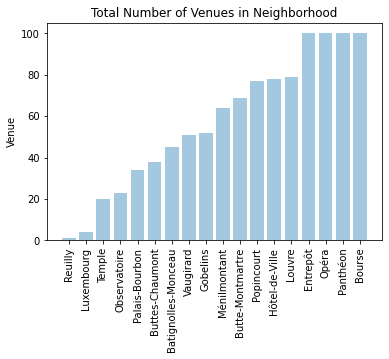

In [375]:
#Bar chart with Number of Venues in Neighborhood
objects = sry.Neighborhood
y_pos = np.arange(len(objects))
performance = sry.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venues in Neighborhood')
plt.xticks(rotation=90)

plt.show()

## **12-Check the frequence all different companies and businesses per Venue Category**

In [376]:
paris_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Afghan Restaurant,1,1,1,1,1,1
African Restaurant,5,5,5,5,5,5
American Restaurant,3,3,3,3,3,3
Antique Shop,1,1,1,1,1,1
Arcade,1,1,1,1,1,1
Argentinian Restaurant,3,3,3,3,3,3
Art Gallery,2,2,2,2,2,2
Art Museum,10,10,10,10,10,10
Arts & Crafts Store,1,1,1,1,1,1


#**12.1-Summary**

In [377]:
print(paris_venues.groupby('Venue Category').size())
print("Total number of rows is:", paris_venues.groupby('Venue Category').size().shape)

Venue Category
Afghan Restaurant                   1
African Restaurant                  5
American Restaurant                 3
Antique Shop                        1
Arcade                              1
Argentinian Restaurant              3
Art Gallery                         2
Art Museum                         10
Arts & Crafts Store                 1
Asian Restaurant                    6
Auditorium                          1
Bakery                             24
Bar                                53
Basque Restaurant                   1
Bed & Breakfast                     2
Beer Bar                            5
Beer Garden                         5
Beer Store                          1
Bistro                             28
Boat or Ferry                       1
Bookstore                           6
Boutique                            3
Boxing Gym                          1
Brasserie                           5
Brazilian Restaurant                1
Breakfast Spot                     

###***French restaurants seem to be in the majority, followed by hotels, then by Italian restaurants.***

##**13- Relationship between Venues catégory ans Frequence of retaurants**

In [378]:
paris_venues_resto = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
# set index to start from 1
paris_venues_resto.index = np.arange(1, len(paris_venues_resto)+1)

# create a dataframe with the venue category and counts
df_f = paris_venues_resto['Venue Category'].value_counts().to_frame(name='Restaurants Frequency')
df_f = df_f.reset_index()
df_f.rename(index=str, columns={"index": "venue_category"}, inplace=True)

In [379]:
print(df_f.head(15))
print('There are',df_f.shape[0],'rows and',df_f.shape[1],'columns in this series of dataset')


                   venue_category  Restaurants Frequency
0               French Restaurant                    133
1              Italian Restaurant                     52
2                      Restaurant                     20
3             Japanese Restaurant                     18
4                 Thai Restaurant                     10
5   Vegetarian / Vegan Restaurant                     10
6           Vietnamese Restaurant                      9
7               Indian Restaurant                      9
8              Seafood Restaurant                      8
9            Fast Food Restaurant                      7
10               Asian Restaurant                      6
11      Middle Eastern Restaurant                      6
12               Sushi Restaurant                      6
13       Mediterranean Restaurant                      5
14             Chinese Restaurant                      5
There are 55 rows and 2 columns in this series of dataset


It seems that the popular culinary specialties of the restaurants at our disposal lean towards French restaurants.  While restaurants with a foreign culinary specialty come in second place, respectively Italian and Asian restaurants. Let's illustrate this trend with a vertical bar chart:

##**13-1 Bar chart of frequncy by venues catégory**

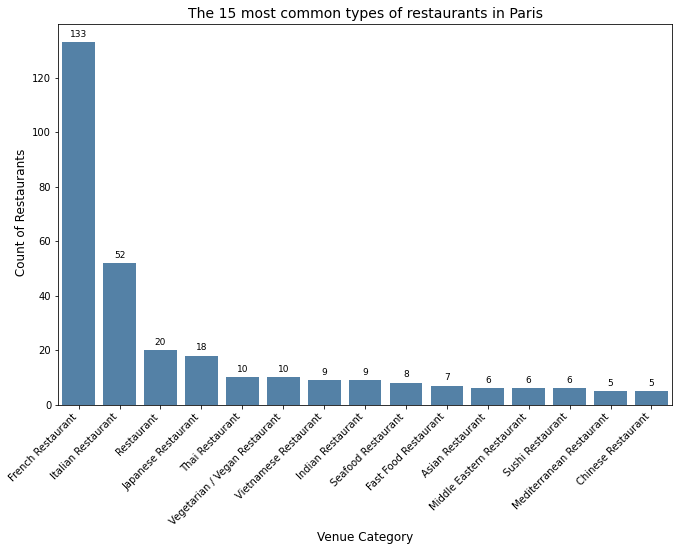

In [380]:
fig = plt.figure(figsize=(11,7))
fig = sns.barplot(x='venue_category',y='Restaurants Frequency',data=df_f[0:15],color='steelblue')
plt.title('The 15 most common types of restaurants in Paris', fontsize=14)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel (" Count of Restaurants", fontsize=12)
plt.xticks(rotation=45,  horizontalalignment='right')

for bar in fig.patches:
    # passing the coordinates where the annotation shall be done
    fig.annotate(format(bar.get_height(), '.0f'), # y-coordinate: bar.get_height()
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),# x-coordinate: bar.get_x() + bar.get_width() / 2
                 ha='center',# ha stand for the horizontal alignment
                 va='center',# va stand for the vertical alignment
                 size=9, xytext=(0, 8),# free space to be left to make graph pleasing: (0, 8)
                 textcoords='offset points')

plt.savefig("15 Most Frequent Restaurant Types in Paris.png")

plt.show()

We note respectively that the French and Italian restaurants are well and truly in the majority, followed by the Asian and africa restaurants(Japan in the lead)

# **14-Analyzing each neigborhood: Top 5 of all businesses and restaurants present by district in Paris**

* We now have a clear idea of both the different leux by category of the arrondissements of Paris and the different restaurants that can be found there. We also have a clear idea of the most popular culinary type among these restaurants. We can ask ourselves: what could be the top 5 frequencies of appearance of all the different shops present next to the restaurants. This question is important because it is always useful to know what type of business can be an economic opportunity or an obstacle to the existence of a restaurant.  To do this we will start by encoding our dataset.

## **14-0 One Hot Encoding**
Encoding with the "OneHot Encoding" method allows us to assign the categorical values of our dataset into calculable numerical values (Encoding). 

* It is thus by this means that we will manage to encode these categorical values. 
* This will then allow us to calculate the average frequency of occurrence of the note dataframe samples that we are going to group.

* This is important because it is from this average occurance of our samples of different restaurants and businesses in our dataset that we will be able to establish a top 5 of these samples

* Let's first do the encoding before calculating:

In [381]:
# one hot encoding
p_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
p_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [p_onehot.columns[-1]] + list(p_onehot.columns[:-1])
p_onehot = p_onehot[fixed_columns]

p_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Outdoor Sculpture,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roman Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# **14-1 check dataframe shape**

In [382]:
# check dataframe shape
print(f'New dataframe has {p_onehot.shape[0]} rows, and {p_onehot.shape[1]} columns')

New dataframe has 1035 rows, and 197 columns


# **14-2-Let's now group rows by neighborhood and take the mean of the frequency of occurrence of each business category**

In [383]:
p_grouped = p_onehot.groupby('Neighborhood').mean().reset_index()
p_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Outdoor Sculpture,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roman Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.022222,0.022222,0.000000,0.000000,0.000000,0.022222,0.044444,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.044444,0.00,0.022222,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.022222,0.000000,0.000000,0.022222,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.022222,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.022222,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.022222,0.066667,0.022222,0.000000,0.022222,0.000000,0.000000,0.022222,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.022222,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.022222,0.000000,0.022222,0.022222,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,

In [384]:
# check dataframe shape
print(f'Grouped DataFrame has {p_grouped.shape[0]} rows, {p_grouped.shape[1]} columns')

Grouped DataFrame has 18 rows, 197 columns


# **14-3 The top 5 of all businesses and restaurants present by neighborhood, in Paris** 

In [385]:
num_top_venues = 5
for hood in p_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = p_grouped[p_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.20
1              Hotel  0.07
2                Bar  0.04
3     Sandwich Place  0.04
4       Burger Joint  0.04


----Bourse----
                 venue  freq
0    French Restaurant  0.08
1         Cocktail Bar  0.05
2                Hotel  0.05
3  Japanese Restaurant  0.04
4               Bistro  0.04


----Butte-Montmartre----
                       venue  freq
0                        Bar  0.16
1          French Restaurant  0.16
2  Middle Eastern Restaurant  0.04
3         Italian Restaurant  0.04
4                      Plaza  0.03


----Buttes-Chaumont----
                venue  freq
0   French Restaurant  0.26
1          Restaurant  0.05
2                Park  0.05
3  Italian Restaurant  0.05
4                Pool  0.05


----Entrepôt----
               venue  freq
0  French Restaurant  0.10
1             Bistro  0.08
2              Hotel  0.06
3        Coffee Shop  0.05
4               Café  0.04


----G

We note that in almost all areas of Paris, French restaurants remain in first position of the top 5, followed by foreign culinary specialties, namely Italian and Asian restaurants:
* Indeed, We can see that in Batignolles-Monceau there are 20% French restaurants and 2% Italian restaurants. These two types of restaurants are located at the top of three almost similar types of businesses (Hotel, Bar, Burger Joint) which can become a competition or an opportunity depending on the evolution of the tastes of the clientele present in this place.
In the second district, "Bourse", we also notice that there are still 8% French restaurants and 4% Japanese restaurants. These two restaurants are also in the middle of other meal providers that can compete with them or take advantage of them to succeed. This pattern is almost the same for all the different places in the top5.

#**14-4 Let's put results into dataframe**

In [386]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [387]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = p_grouped['Neighborhood']

for ind in np.arange(p_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(p_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Bar,Burger Joint,Sandwich Place,Yoga Studio,Salad Place,Pool,Playground,Pastry Shop
1,Bourse,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Coffee Shop,Plaza,Bakery,Italian Restaurant,Pizza Place
2,Butte-Montmartre,Bar,French Restaurant,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Gastropub,Park,Pizza Place,Plaza,Coffee Shop
3,Buttes-Chaumont,French Restaurant,Italian Restaurant,Pool,Park,Restaurant,Hotel,Café,Skating Rink,Scenic Lookout,Soup Place
4,Entrepôt,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Restaurant,Pizza Place,Indian Restaurant,Bar,Bakery


#**PART III: Clustering by k-means machin learning**

##**15-Cluster Neighborhoods**
####Let's run k-means to cluster our neighborhoods. But before, let's use Silhouette method to find the ideal k number of groups :

###**15-1 We use here the solhouette method to determine the ideal number k of clusters available in our dataset:**
####1- A score close to +1 indicates a correct membership of a data point to its cluster.
####2- A score close to 0 indicates a membership of a point in the border between two clusters.
####3- A score close to -1 indicates a distant membership of a data point to its true cluster.


In [388]:
p_grouped_cluster = p_grouped.drop('Neighborhood', axis=1)

k_ideal = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, k_ideal+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(p_grouped_cluster)
    cluster_labels = kmeans.labels_
        
    silhouette_avg = silhouette_score(p_grouped_cluster, cluster_labels)
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")  

For n_clusters: 2, average silhouette score: 0.671
For n_clusters: 3, average silhouette score: 0.464
For n_clusters: 4, average silhouette score: 0.399
For n_clusters: 5, average silhouette score: 0.123
For n_clusters: 6, average silhouette score: 0.120
For n_clusters: 7, average silhouette score: 0.088
For n_clusters: 8, average silhouette score: 0.137
For n_clusters: 9, average silhouette score: 0.098
For n_clusters: 10, average silhouette score: 0.072



###***We see that the score = 0.681 is closer to +1 and corresponds to k =2 clusters : k = 2 is the ideal number of clusters to our dataframe***

In [389]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0).fit(p_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:17] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

##**15-2- Create a new dataframe that includes the cluster...**


In [390]:
#Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [391]:

p_merged = df_paris
# merge paris_grouped with paris data to add latitude/longitude for each neighborhood
p_merged = p_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

p_merged.head(16) # check the last columns!

,Name,Population(2017),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,100196,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Bar,Cosmetics Shop,Museum,Historic Site
1,Bourse,100196,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Coffee Shop,Plaza,Bakery,Italian Restaurant,Pizza Place
2,Temple,100196,31.098207,-97.342785,0.0,Italian Restaurant,Bar,Train Station,Snack Place,Pub,Bus Station,Park,Sushi Restaurant,Garden Center,Discount Store
3,Hôtel-de-Ville,100196,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Bakery,History Museum,Ice Cream Shop,Mediterranean Restaurant,Plaza,Coffee Shop
4,Panthéon,59631,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Bistro,Church
5,Luxembourg,41976,49.815868,6.129675,0.0,Racetrack,Print Shop,Pizza Place,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,52193,48.861596,2.317909,0.0,French Restaurant,Plaza,Italian Restaurant,Beer Garden,Pedestrian Plaza,Hotel,Bistro,Pharmacy,Coffee Shop,Sandwich Place
7,Élysée,37368,4.753042,-54.044953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Opéra,60071,48.876019,2.339962,0.0,French Restaurant,Hotel,Wine Bar,Burger Joint,Bakery,Tea Room,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Bar
9,Entrepôt,90836,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Restaurant,Pizza Place,Indian Restaurant,Bar,Bakery


##**15-2-1 Our data set does not seem to be very clean: let's chech that** 

In [392]:
p_merged.isnull().sum()/p_merged.count()*100

Name                       0.000000
Population(2017)           0.000000
Latitude                   0.000000
Longitude                  0.000000
Cluster Labels            11.111111
1st Most Common Venue     11.111111
2nd Most Common Venue     11.111111
3rd Most Common Venue     11.111111
4th Most Common Venue     11.111111
5th Most Common Venue     11.111111
6th Most Common Venue     11.111111
7th Most Common Venue     11.111111
8th Most Common Venue     11.111111
9th Most Common Venue     11.111111
10th Most Common Venue    11.111111
dtype: float64

####***There are 11.1% missing values in some rows of the DataFrame***

#**15-2-2 Indeed, we notice that we have a total of 20 rows in our dataset of which only 18 are non-null. We so have missing values:**

In [393]:
print(p_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    20 non-null     object 
 1   Population(2017)        20 non-null     int64  
 2   Latitude                20 non-null     float64
 3   Longitude               20 non-null     float64
 4   Cluster Labels          18 non-null     float64
 5   1st Most Common Venue   18 non-null     object 
 6   2nd Most Common Venue   18 non-null     object 
 7   3rd Most Common Venue   18 non-null     object 
 8   4th Most Common Venue   18 non-null     object 
 9   5th Most Common Venue   18 non-null     object 
 10  6th Most Common Venue   18 non-null     object 
 11  7th Most Common Venue   18 non-null     object 
 12  8th Most Common Venue   18 non-null     object 
 13  9th Most Common Venue   18 non-null     object 
 14  10th Most Common Venue  18 non-null     obje

In [394]:
print('We have',p_merged.shape[0],'rows and',p_merged.shape[1],'columns' )

We have 20 rows and 15 columns


# **15-2-3 Let's drop 7th and 15th rows where there are missing values**

In [395]:
# Let's drop 7th and 15th rows where there are missing values
p_merged.drop(p_merged.index[[7,15]],axis = 0,inplace=True)

In [396]:
p_merged

,Name,Population(2017),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,100196,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Bar,Cosmetics Shop,Museum,Historic Site
1,Bourse,100196,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Coffee Shop,Plaza,Bakery,Italian Restaurant,Pizza Place
2,Temple,100196,31.098207,-97.342785,0.0,Italian Restaurant,Bar,Train Station,Snack Place,Pub,Bus Station,Park,Sushi Restaurant,Garden Center,Discount Store
3,Hôtel-de-Ville,100196,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Bakery,History Museum,Ice Cream Shop,Mediterranean Restaurant,Plaza,Coffee Shop
4,Panthéon,59631,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Bistro,Church
5,Luxembourg,41976,49.815868,6.129675,0.0,Racetrack,Print Shop,Pizza Place,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,52193,48.861596,2.317909,0.0,French Restaurant,Plaza,Italian Restaurant,Beer Garden,Pedestrian Plaza,Hotel,Bistro,Pharmacy,Coffee Shop,Sandwich Place
8,Opéra,60071,48.876019,2.339962,0.0,French Restaurant,Hotel,Wine Bar,Burger Joint,Bakery,Tea Room,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Bar
9,Entrepôt,90836,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Restaurant,Pizza Place,Indian Restaurant,Bar,Bakery
10,Popincourt,147470,48.858416,2.379703,0.0,French Restaurant,Café,Cocktail Bar,Bar,Restaurant,Bistro,Pastry Shop,Italian Restaurant,Bakery,Vegetarian / Vegan Restaurant


In [397]:
# New shape
print( 'We now see that we have',p_merged.shape[0],'rows and',p_merged.shape[1],'columns')

We now see that we have 18 rows and 15 columns


##**15-2-4-Let's see the resulting clusters with folium map**

In [398]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(p_merged['Latitude'],
                                  p_merged['Longitude'],
                                  p_merged['Name'], 
                                  p_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster+1)+')', parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=27,
                        popup=label,
                        #color=rainbow[int(cluster)-1],
                        color='blue',
                        fill=False,
                        #fill_color=rainbow[int(cluster)-1],
                        #fill_opacity=0.7
                        ).add_to(map_clusters)
map_clusters

#**15-3-Examine each clusters**

### Let's examine each cluster and determine the discriminating venue categories that distinguish each cluster.

# ***15-3-1 Cluster 1***

In [399]:
p_merged.loc[p_merged['Cluster Labels'] == 0, p_merged.columns[[0] + list(range(2, p_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,48.861147,2.338028,0.0,French Restaurant,Café,Plaza,Hotel,Art Museum,Coffee Shop,Bar,Cosmetics Shop,Museum,Historic Site
1,Bourse,48.868630,2.341474,0.0,French Restaurant,Cocktail Bar,Hotel,Japanese Restaurant,Bistro,Coffee Shop,Plaza,Bakery,Italian Restaurant,Pizza Place
2,Temple,31.098207,-97.342785,0.0,Italian Restaurant,Bar,Train Station,Snack Place,Pub,Bus Station,Park,Sushi Restaurant,Garden Center,Discount Store
3,Hôtel-de-Ville,43.949283,4.805260,0.0,French Restaurant,Hotel,Bar,Italian Restaurant,Bakery,History Museum,Ice Cream Shop,Mediterranean Restaurant,Plaza,Coffee Shop
4,Panthéon,41.898616,12.476833,0.0,Italian Restaurant,Plaza,Hotel,Ice Cream Shop,Sandwich Place,Fountain,Pizza Place,Monument / Landmark,Bistro,Church
5,Luxembourg,49.815868,6.129675,0.0,Racetrack,Print Shop,Pizza Place,Food & Drink Shop,Yoga Studio,Empanada Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Palais-Bourbon,48.861596,2.317909,0.0,French Restaurant,Plaza,Italian Restaurant,Beer Garden,Pedestrian Plaza,Hotel,Bistro,Pharmacy,Coffee Shop,Sandwich Place
8,Opéra,48.876019,2.339962,0.0,French Restaurant,Hotel,Wine Bar,Burger Joint,Bakery,Tea Room,Restaurant,Vegetarian / Vegan Restaurant,Bistro,Bar
9,Entrepôt,48.876126,2.359839,0.0,French Restaurant,Bistro,Hotel,Coffee Shop,Café,Restaurant,Pizza Place,Indian Restaurant,Bar,Bakery
10,Popincourt,48.858416,2.379703,0.0,French Restaurant,Café,Cocktail Bar,Bar,Restaurant,Bistro,Pastry Shop,Italian Restaurant,Bakery,Vegetarian / Vegan Restaurant


####***The predominant restaurants (French and Italian restaurants) are in the first group. They are closely followed by the Japanese restaurants in second position***

# ***15-3-2 Cluster 2***

In [400]:
p_merged.loc[p_merged['Cluster Labels'] == 1, p_merged.columns[[0] + list(range(2, p_merged.shape[1]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reuilly,49.07814,1.2238,1.0,Construction & Landscaping,Yoga Studio,English Restaurant,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


* The second group corresponds mainly to the first common venue of Reuilly, where there are mainly companies of construction and landscaping(in 1et Most Common Venue), and yoga studio (in the 2nd most common venue), and some other following restaurants

# **Discussion and Recommendation:**


* With the histogram, and the representation of the two maps, we discovered that French, Italian and Japanese restaurants, respectively, are the most popular and are mainly located in Parisian neighborhoods.

* This observation is confirmed by the realization of the two clusters which clearly show that the predominant restaurants (French and Italian restaurants) are located in Paris, where the main cluster is located.  Japanese restaurants are in third position 

* For someone who wants to open a restaurant in Paris with a foreign culinary specialty, I would recommend opening an Italian or Japanese restaurant, both of which are popular in Paris. But if he decides to open a French restaurant, I would recommend opening it in the Gobelins district, where there are fewer French restaurants, or in Reuilly, where there are almost none of these three culinary specialties.


* In fact, French, Italian and Japanese restaurants are popular in France. This indicates that the inhabitants of Paris have a very high taste for these types of restaurants, so the areas of Paris where there are very few of these restaurants are places where there is less competition and more demand.
The second cluster corresponds mainly to the first common place in Reuilly, which is far from the Paris neighborhoods: there are mainly construction and landscaping companies, and a yoga studio (in the second common place).

#  **Conclusion:**

* This Capstone data science project was very rewarding for me. I had to understand and assimilate the most real way to solve a concrete data science business problem. How to solve a seemingly insurmountable business problem with a clear methodological approach.
Although the project was specifically dedicated to a geolocation problem using the Foursquare API, it allowed me to deepen a much better ability to analyze any data science and data analysis problem.

